In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence



In [27]:
top_words = 5000
input_length = 500  #legnth of index 

(X_train, y_train) , (X_test, y_test)=tf.keras.datasets.imdb.load_data(num_words=top_words)

In [28]:
X_train.shape #every feature is sample 
print(len(X_train))
print(len(X_test))
y_train[:5]
len(X_train[0])
X_train[0]

25000
25000


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [29]:
wordIndex=tf.keras.datasets.imdb.get_word_index()
print(wordIndex["good"])
 

49


In [30]:
X_train = sequence.pad_sequences(X_train, maxlen=input_length)
X_test = sequence.pad_sequences(X_test, maxlen=input_length) #this for embedding layer want fixed size 500
print(); print(X_train.shape);  print(X_train[0]) #Turns positive integers (indexes) into dense vectors of fixed size


(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   

In [31]:
from keras.regularizers import l1
model = Sequential()
model.add(Embedding(top_words, 32, input_length=input_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) 
#model.add(Dense(250, activation='relu',activity_regularizer=l1(0.004)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8000)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 8001      
                                                                 
Total params: 171,105
Trainable params: 171,105
Non-trainable params: 0
________________________________________________

In [32]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128,
              epochs=10)

Epoch 1/10
196/196 [==============================] - 21s 101ms/step - loss: 0.4914 - accuracy: 0.7479 - val_loss: 0.3025 - val_accuracy: 0.8735
Epoch 2/10
196/196 [==============================] - 20s 101ms/step - loss: 0.2565 - accuracy: 0.8988 - val_loss: 0.2854 - val_accuracy: 0.8796
Epoch 3/10
196/196 [==============================] - 19s 95ms/step - loss: 0.2133 - accuracy: 0.9168 - val_loss: 0.3102 - val_accuracy: 0.8723
Epoch 4/10
196/196 [==============================] - 19s 98ms/step - loss: 0.1895 - accuracy: 0.9267 - val_loss: 0.3722 - val_accuracy: 0.8552
Epoch 5/10
196/196 [==============================] - 19s 98ms/step - loss: 0.1732 - accuracy: 0.9346 - val_loss: 0.2972 - val_accuracy: 0.8828
Epoch 6/10
196/196 [==============================] - 19s 98ms/step - loss: 0.1577 - accuracy: 0.9405 - val_loss: 0.3029 - val_accuracy: 0.8818
Epoch 7/10
196/196 [==============================] - 19s 96ms/step - loss: 0.1431 - accuracy: 0.9478 - val_loss: 0.3194 - val_accurac

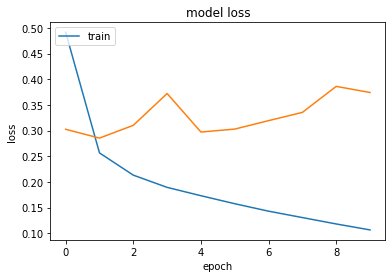

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()


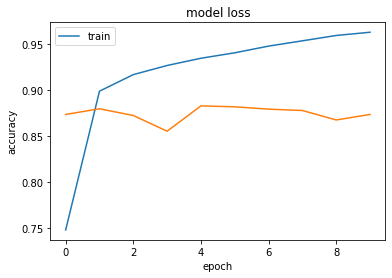

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()

In [35]:
import numpy
from numpy import array
bad = "this movie was terrible and bad"
good = "i really liked the movie and had fun"
for review in [good,bad]:
    tmp = []
    for word in review.split(" "):
        print(wordIndex[word])
        tmp.append(wordIndex[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=input_length) 
    print(tmp_padded)
    print("%s. Sentiment: %s" % (review,model.predict(array([tmp_padded][0]))[0][0]))


10
63
420
1
17
2
66
250
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 